In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle
import matplotlib.pyplot as plt





def apply_lda(X_train, y_train, X_test, n_components=5):
    lda = LDA(n_components=n_components)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    explained_variance = lda.explained_variance_ratio_
    print(f"Explained Variance by LDA Components: {explained_variance}")
    return X_train_lda, X_test_lda




def split_scalar(indep_X,dep_Y):
        X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)    
        return X_train, X_test, y_train, y_test


 
def cm_prediction(classifier,X_test):
         y_pred = classifier.predict(X_test)
            
            # Making the Confusion Matrix
         from sklearn.metrics import confusion_matrix
         cm = confusion_matrix(y_test, y_pred)
            
         from sklearn.metrics import accuracy_score 
         from sklearn.metrics import classification_report 
            #from sklearn.metrics import confusion_matrix
            #cm = confusion_matrix(y_test, y_pred)
            
         Accuracy=accuracy_score(y_test, y_pred )
            
         report=classification_report(y_test, y_pred)
         return  classifier,Accuracy,report,X_test,y_test,cm

def logistic(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      
    
def svm_linear(X_train,y_train,X_test):
            from sklearn.svm import SVC
            classifier = SVC(kernel = 'linear', random_state = 0)
            classifier.fit(X_train, y_train)
            classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
            return  classifier,Accuracy,report,X_test,y_test,cm
    
def svm_NL(X_train,y_train,X_test):
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
   
def Navie(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm         
    
    
def knn(X_train,y_train,X_test):
           
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

def Decision(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      


def random(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm



    
def linearDiscriminant(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['ChiSquare'],columns=['Logistic','SVMl','SVMnl','KNN','Navie','Decision','Random'])
    for number,idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex]=acclog[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['KNN'][idex]=accknn[number]
        dataframe['Navie'][idex]=accnav[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe

In [2]:

dataset1 = pd.read_csv("PreProcessedEmployee.csv", index_col=None)
dataset1
df2 = dataset1
df2 = pd.get_dummies(df2, drop_first=True)


# Convert all boolean columns to 0 and 1, except 'Resigned'
for col in df2.select_dtypes(include=['bool']).columns:
    if col != 'Resigned':  # Keep 'Resigned' as is
        df2[col] = df2[col].astype(int)
df2
indep_X = df2.drop(['Performance_Score','Work_Hours_Per_Week','Projects_Handled','Resigned','Department_Engineering',	'Department_Finance','Gender_Other','Job_Title_Consultant',	'Job_Title_Developer',	'Job_Title_Engineer',	'Job_Title_Manager'	,'Job_Title_Specialist'	,'Job_Title_Technician',	'Education_Level_Master',	'Education_Level_PhD'] ,axis=1)  # Features
dep_Y = df2['Performance_Score']  # Target



# Split the dataset
#X_train, X_test, y_train, y_test = split_scalar(lda_data, dep_Y)


In [3]:
#Split the dataset
# Split and scale data
X_train, X_test, y_train, y_test = split_scalar(indep_X, dep_Y)

In [4]:
print(df2.columns)

Index(['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary',
       'Work_Hours_Per_Week', 'Projects_Handled', 'Promotions', 'Resigned',
       'Department_Engineering', 'Department_Finance', 'Department_HR',
       'Department_IT', 'Department_Legal', 'Department_Marketing',
       'Department_Operations', 'Department_Sales', 'Gender_Male',
       'Gender_Other', 'Job_Title_Consultant', 'Job_Title_Developer',
       'Job_Title_Engineer', 'Job_Title_Manager', 'Job_Title_Specialist',
       'Job_Title_Technician', 'Education_Level_High School',
       'Education_Level_Master', 'Education_Level_PhD'],
      dtype='object')


In [5]:
df2

,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Promotions,Resigned,Department_Engineering,Department_Finance,...,Gender_Other,Job_Title_Consultant,Job_Title_Developer,Job_Title_Engineer,Job_Title_Manager,Job_Title_Specialist,Job_Title_Technician,Education_Level_High School,Education_Level_Master,Education_Level_PhD
0,55,2,5.0,6750,33,32,0,False,0,0,...,0,0,0,0,0,1,0,1,0,0
1,29,0,5.0,7500,34,34,2,False,0,1,...,0,0,1,0,0,0,0,1,0,0
2,55,8,3.0,5850,37,27,0,False,0,1,...,0,0,0,0,0,1,0,1,0,0
3,48,7,2.0,4800,52,10,1,False,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36,3,2.0,4800,38,11,1,False,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,45,4,5.0,9000,48,9,1,False,0,0,...,0,0,0,0,1,0,0,0,0,0
245,32,2,4.0,6300,55,46,2,False,0,0,...,0,0,0,0,0,1,0,0,0,0
246,24,7,4.0,4900,30,33,0,False,0,0,...,0,0,0,0,0,0,1,0,0,0
247,43,3,2.0,4800,57,36,1,False,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:


# Apply LDA to the dataset
lda_data = apply_lda(X_train, y_train,X_test, n_components=1)


acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]

Explained Variance by LDA Components: [0.73585282]


In [15]:
lda_data

(array([[-2.19226574],
        [ 0.25176959],
        [ 1.23582761],
        [-1.36353261],
        [-1.44356913],
        [ 1.39374622],
        [ 1.91372337],
        [ 0.44726669],
        [-0.30901493],
        [-0.51566448],
        [ 1.7443544 ],
        [-1.37967782],
        [-1.11741342],
        [-1.32544886],
        [ 0.58109657],
        [ 0.85594118],
        [ 0.73326768],
        [ 1.67737937],
        [ 0.82431921],
        [ 0.77733   ],
        [-1.77354184],
        [ 2.20073104],
        [ 1.41428681],
        [-1.03917159],
        [ 0.20470536],
        [-1.1338682 ],
        [ 1.47531659],
        [-0.52213436],
        [-0.28024603],
        [-1.83354328],
        [-1.20561287],
        [-0.86568933],
        [-1.51303636],
        [ 0.21308364],
        [-0.39674478],
        [ 1.68154132],
        [-0.78711118],
        [-1.44130423],
        [-1.56071014],
        [-0.81154061],
        [ 0.7437853 ],
        [ 0.47220027],
        [ 0.45535087],
        [-1

In [16]:

# Split and scale the data
X_train, X_test, y_train, y_test = split_scalar(indep_X, dep_Y)
        
classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
acclog.append(Accuracy)

classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
accsvml.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test)  
accsvmnl.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test)  
accknn.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test)  
accnav.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test)  
accdes.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test)  
accrf.append(Accuracy)
    
result=linearDiscriminant(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)


C:\Users\sindhiya maria\anaconda3\envs\Aiml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sindhiya maria\anaconda3\envs\Aiml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sindhiya maria\anaconda3\envs\Aiml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [13]:
result
#2

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.174603,0.15873,0.206349,0.238095,0.111111,0.730159,0.380952


In [17]:
result
#1

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.174603,0.15873,0.206349,0.238095,0.111111,0.730159,0.380952


In [9]:
result
#3

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.174603,0.15873,0.206349,0.238095,0.111111,0.730159,0.380952


Confusion Matrix:
 [[32 14]
 [ 1  3]]

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.70      0.81        46
        True       0.18      0.75      0.29         4

    accuracy                           0.70        50
   macro avg       0.57      0.72      0.55        50
weighted avg       0.91      0.70      0.77        50



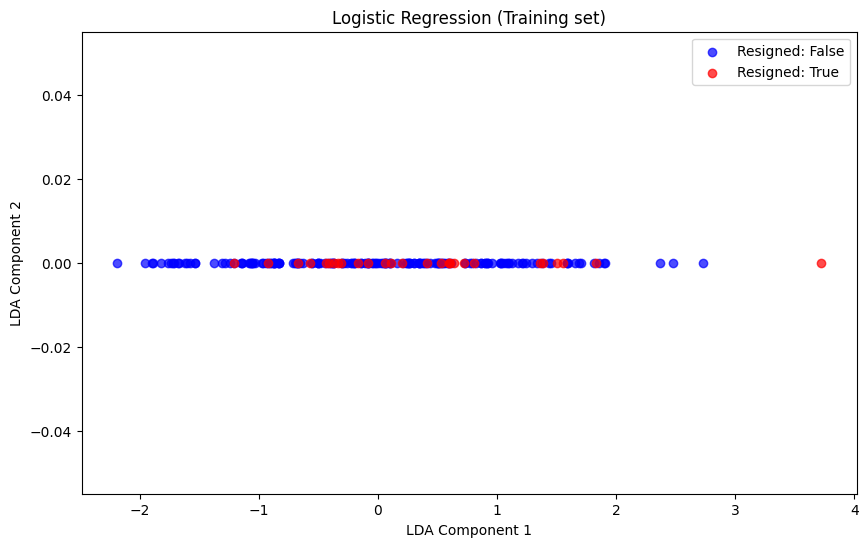

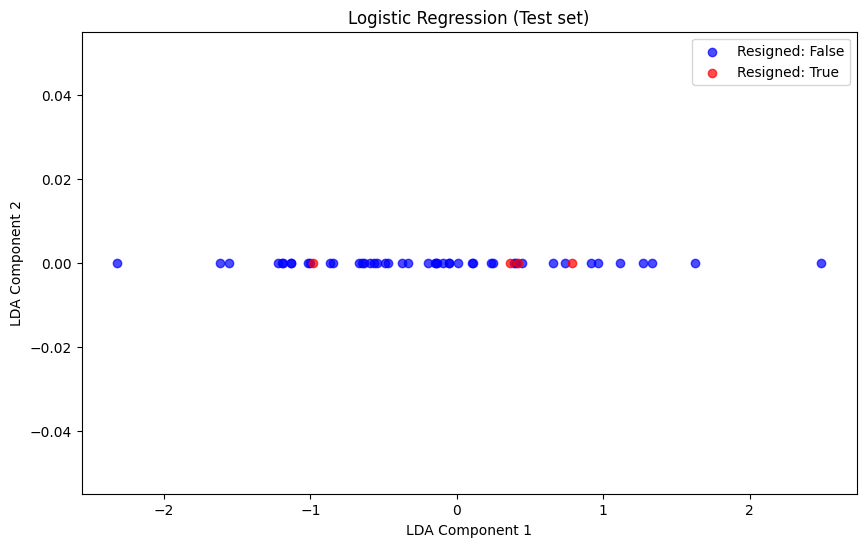

In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
dataset = pd.read_csv('PreProcessedEmployee.csv')

# Encode categorical features
categorical_columns = ['Department', 'Gender', 'Job_Title', 'Education_Level']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    dataset[col] = label_encoders[col].fit_transform(dataset[col])

# Define features and target
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply LDA with 1 component (since we have binary classification)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=0)

# Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression Model
classifier = LogisticRegression(random_state=0,class_weight='balanced')
classifier.fit(X_train_resampled, y_train_resampled)

# Predict on Test Data
y_pred = classifier.predict(X_test)

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualization function for 1D LDA
def plot_lda_results(X_set, y_set, title):
    plt.figure(figsize=(10, 6))
    colors = {0: 'blue', 1: 'red'}

    for resign_status in np.unique(y_set):
        subset = pd.DataFrame(X_set)[y_set == resign_status]
        plt.scatter(subset[0], np.zeros_like(subset[0]), 
                    c=colors[resign_status], label=f'Resigned: {resign_status}', alpha=0.7)

    plt.title(title)
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')  
    plt.legend()
    plt.show()

# Plot results
plot_lda_results(X_train, y_train, 'Logistic Regression (Training set)')
plot_lda_results(X_test, y_test, 'Logistic Regression (Test set)')
